In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

#### Steps: - tentative
1. Data understanding 
 - Import the data
 - Checking for null values
 - Checking for summary of the dataset


2. Data Preparation and EDA
 - Remove and irrelavant features
 - Check for skewness in target variable and transform the data if necessary
 - Convert categorical varaibles to numerical variables
 - Split the data to train and test sets
 - Scale the data (transform & fit on train, fit on test) 
 - Plot pair plots and correlation heatmaps for understanding relationships in the data set
     

3. Model building
 - Choosing an appropirate model
     - Multicollinearity checks
 - Test the initial linear regression model
 - Feature Selection / Feature Engineering
     - Variable Transformation
 - Drop insignificant variables
     - Using p-value
     - VIF
     - RFE
 - Iteratively test the model
 - Bais / Variance Trade off
 - Regularization
 - Imporve R2, Adjusted R2, AIC, BIC, F statistic & other metrics


4. Model evaluation
 - Check results on test set

In [39]:
car_data = pd.read_csv("CarPrice_Assignment.csv")

In [40]:
car_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

#### Step 1. Underding the data

In [41]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [42]:
car_data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

#### Step 2. Data Preparation and EDA

In [43]:
# Removing unnecessary variables
car_data.drop(['car_ID','CarName'], axis=1, inplace=True)

In [44]:
# Exploring categorical variables
print("Unique values in Fuel Type      :",car_data['fueltype'].unique())
print("Unique values in Aspiration     :",car_data['aspiration'].unique())
print("Unique values in Door Number    :",car_data['doornumber'].unique())
print("Unique values in Door Number    :",car_data['drivewheel'].unique())
print("Unique values in Engine Location:",car_data['enginelocation'].unique())
print("Unique values in Car Body       :",car_data['carbody'].unique())
print("Unique values in Engine Type.   :",car_data['enginetype'].unique())
print("Unique values in Cylinder Number:",car_data['cylindernumber'].unique())
print("Unique values in Fuel System    :",car_data['fuelsystem'].unique())

Unique values in Fuel Type      : ['gas' 'diesel']
Unique values in Aspiration     : ['std' 'turbo']
Unique values in Door Number    : ['two' 'four']
Unique values in Door Number    : ['rwd' 'fwd' '4wd']
Unique values in Engine Location: ['front' 'rear']
Unique values in Car Body       : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in Engine Type.   : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in Cylinder Number: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in Fuel System    : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [45]:
# Converting categorical variables to numerical variables
car_data['fueltype'] = car_data['fueltype'].map({'gas': 1, 'diesel': 0})
car_data['aspiration'] = car_data['aspiration'].map({'std': 1, 'turbo': 0})
car_data['doornumber'] = car_data['doornumber'].map({'two': 1, 'four': 0})
car_data['enginelocation'] = car_data['enginelocation'].map({'front': 1, 'rear': 0})

# Creating dummy variables for features with more than 2 unique values
carbody = pd.get_dummies(car_data['drivewheel'],drop_first=True)
car_data = pd.concat([car_data,carbody],axis=1)
carbody = pd.get_dummies(car_data['carbody'],drop_first=True)
car_data = pd.concat([car_data,carbody],axis=1)
enginetype = pd.get_dummies(car_data['enginetype'],drop_first=True)
car_data = pd.concat([car_data,enginetype],axis=1)
cylindernumber = pd.get_dummies(car_data['cylindernumber'],drop_first=True)
car_data = pd.concat([car_data,cylindernumber],axis=1)
fuelsystem = pd.get_dummies(car_data['fuelsystem'],drop_first=True)
car_data = pd.concat([car_data,fuelsystem],axis=1)

# Droping un-necessary variables
car_data.drop(['carbody','enginetype','cylindernumber','fuelsystem','drivewheel'], axis=1, inplace=True)
car_data.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0          3         1           1           1               1       88.6   
1          3         1           1           1               1       88.6   
2          1         1           1           1               1       94.5   
3          2         1           1           0               1       99.8   
4          2         1           1           0               1       99.4   

   carlength  carwidth  carheight  curbweight  ...  three  twelve  two  2bbl  \
0      168.8      64.1       48.8        2548  ...      0       0    0     0   
1      168.8      64.1       48.8        2548  ...      0       0    0     0   
2      171.2      65.5       52.4        2823  ...      0       0    0     0   
3      176.6      66.2       54.3        2337  ...      0       0    0     0   
4      176.6      66.4       54.3        2824  ...      0       0    0     0   

   4bbl  idi  mfi  mpfi  spdi  spfi  
0     0    0    0     1     0     0  
1     0    0    0     1     0     0  
2     0    0    0     1     0     0  
3     0    0    0     1     0     0  
4     0    0    0     1     0     0  

[5 rows x 44 columns]

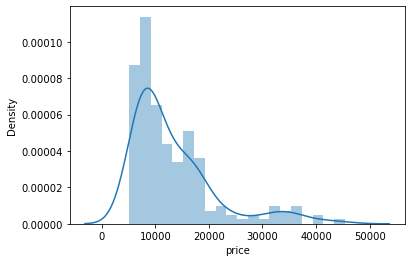

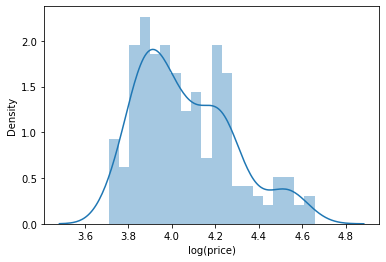

In [46]:
# checking the distribution of the target variable
sns.distplot(car_data['price'], bins = 20)

# The data is right skewed and might require a log distribution of better prediction
# log tranformation (adding 1 to car price value to avoid log(0) error)
car_data['log(price)'] = np.log10(car_data['price']+1)
fig = plt.figure()
sns.distplot(car_data['log(price)'], bins = 20)

# Dropping price column
car_data.drop(['price'], axis=1, inplace=True)

In [47]:
plt.figure(figsize = (40,10),dpi=500)
sns.heatmap(car_data.corr(),annot=True)

<AxesSubplot:>

In [49]:
car_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fwd', 'rwd', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'log(price)'],
      dtype='object')

In [15]:
# Splitting the data to test and train set
car_train_data, car_test_data = train_test_split(car_data,train_size=0.7,random_state=123)

# Creating Standard Scaler object
scaler = StandardScaler()

#Fitting and transform the train set
scaled_features_train = scaler.fit_transform(car_train_data)
car_train_data_scaled = pd.DataFrame(scaled_features_train, 
                                      index=car_train_data.index, 
                                      columns=car_train_data.columns)

#Transforming the train set
scaled_features_test = scaler.transform(car_test_data)
car_test_data_scaled = pd.DataFrame(scaled_features_test, 
                                     index=car_test_data.index, 
                                     columns=car_test_data.columns)

#### Model Building

In [60]:

features = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
               'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
               'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
               'peakrpm', 'citympg', 'highwaympg', 'fwd', 'rwd', 'hardtop',
               'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
               'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
               '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']
y_train = car_train_data_scaled['log(price)']
X_train = car_train_data_scaled[features].to_numpy()
y_test = car_test_data_scaled['log(price)']
X_test = car_test_data_scaled[features].to_numpy()

In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = lm.predict(X_train)

In [68]:
sum((y_pred - y_train) ** 2)

7.874317653378753

In [69]:
r_squared = r2_score(y_pred, y_train)
r_squared

0.9417259730598087